In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

## Loading Data
Set 'data_source' to 'alphavantage' to download and load data from alphavantage

In [3]:
data_source = 'kaggle'

if data_source=='alphavantage':
    api_key="SP3HAWW995G61TIL"
    ticker='AAl' #american airlines
    url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)
    file_to_save='stock_market_data-%s.csv'%ticker
    
    if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data=json.loads(url.read().decode())
            data=data['Time Series (Daily)']
            df=pd.dataframe(columns=['Date','Low','High','Close','Open'])
            for k,v in data.items():
                date=dt.datetime.strptime(k,'%Y-%m-%d')
                data_row=[date.date(),float(v['3. low']),float(v['2. high']),float(v['4. close']),float(v['1. open'])]
                df.loc[-1,:]=data_row
                df.index=df.index+1
            print('Data saved to %s'%file_to_save)
            df.to_csv(file_to_save)
    else:
        print('File already exists. Loading data from csv')
        df=pd.read_csv(file_to_save)

else:
    df=pd.read_csv(os.path.join('Stocks','hpq.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])
    print('Loaded data from kaggle repository')

Loaded data from kaggle repository


In [4]:
df=df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385


## Data visualization
X-axis 500 day interval<br> Y-axis Mid price for each day

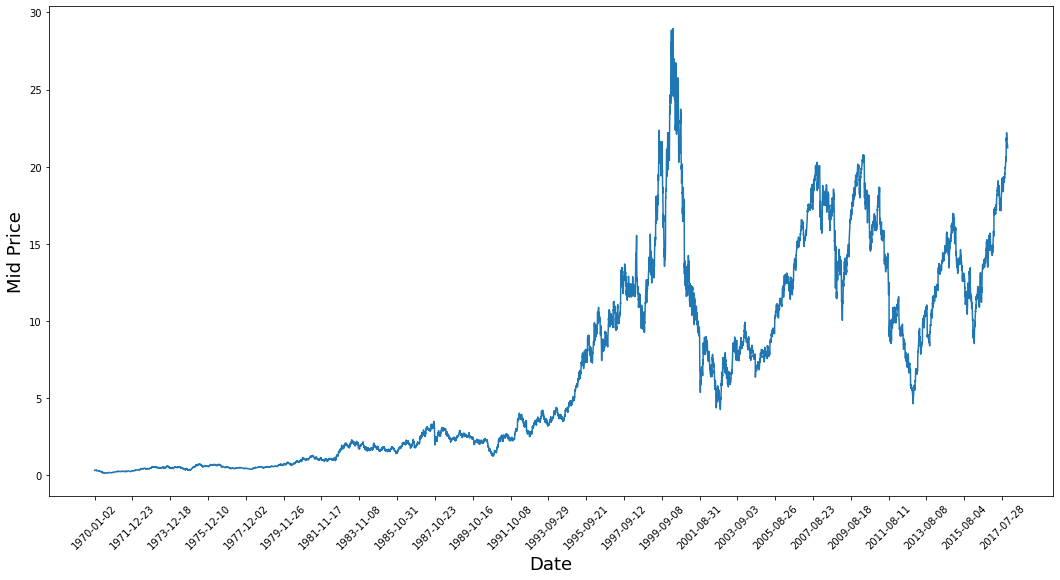

In [5]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()